In [77]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report


The data which we are going to use comes from the Kaggle site (Titanic)

,Survived,Pclass,SibSp,Fare
0,0,3,1,7.2500
1,1,1,1,71.2833
2,1,3,0,7.9250
3,1,1,1,53.1000
4,0,3,0,8.0500


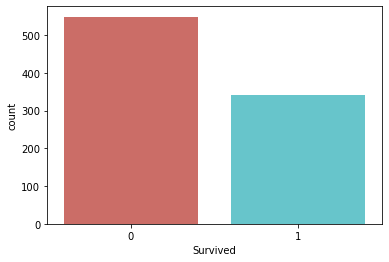

In [90]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

sb.countplot(x='Survived',data=titanic, palette='hls')
titanic.isnull().sum()
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin','Age','Embarked','Parch','Sex'], 1)
titanic_data.head()

### How correlated are the data?
We can view using a heatmap

<AxesSubplot:>

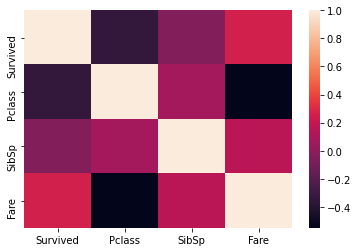

In [91]:
#How correlated are the data?
sb.heatmap(titanic_data.corr())

# Training and Testing data

In [115]:
X=titanic_data.iloc[:,1:3]
y=titanic_data.iloc[:,0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Logistic Regression

In [116]:
# import the class
from sklearn.linear_model import LogisticRegression


# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predictions
y_pred=logreg.predict(X_test)

## Confusion Matrix

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[139,  26],
       [ 58,  45]], dtype=int64)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       165
           1       0.63      0.44      0.52       103

    accuracy                           0.69       268
   macro avg       0.67      0.64      0.64       268
weighted avg       0.68      0.69      0.67       268



# More features added
As you can see, the above logistic regression was a very simple one with very less features. One thing we can do is to increase the number of features and include important features like sex, location etc. And probably we will get accuracy more than 0.69.

In [126]:
titanic.columns
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Seems like PassengerID,Name,Ticket,Cabin are not very important. Let's see how many missing values are there for each of the features or variables.

In [133]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We can remove the Cabin information because it seems that there are a huge number of missing values. We could have also removed the age information, but it is likely that age was a huge factor in determining who survived. So we will drop all the rows with missing values.

In [152]:
titanic_data=titanic.drop(['PassengerId','Name','Ticket','Cabin','Parch'], 1)

In [153]:
titanic_data.dropna(inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
1,1,1,female,38.0,1,71.2833,C
3,1,1,female,35.0,1,53.1000,S
6,0,1,male,54.0,0,51.8625,S
10,1,3,female,4.0,1,16.7000,S
11,1,1,female,58.0,0,26.5500,S


In [154]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()

,male
1,0
3,0
6,1
10,0
11,0


In [155]:
embark_location=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [156]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
1,1,1,female,38.0,1,71.2833,C
3,1,1,female,35.0,1,53.1000,S
6,0,1,male,54.0,0,51.8625,S
10,1,3,female,4.0,1,16.7000,S
11,1,1,female,58.0,0,26.5500,S


In [157]:
titanic_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [158]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Fare
1,1,1,38.0,1,71.2833
3,1,1,35.0,1,53.1000
6,0,1,54.0,0,51.8625
10,1,3,4.0,1,16.7000
11,1,1,58.0,0,26.5500


In [160]:
titanic_final=pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_final.head()

,Survived,Pclass,Age,SibSp,Fare,male,Q,S
1,1,1,38.0,1,71.2833,0,0,0
3,1,1,35.0,1,53.1000,0,0,1
6,0,1,54.0,0,51.8625,1,0,1
10,1,3,4.0,1,16.7000,0,0,1
11,1,1,58.0,0,26.5500,0,0,1


<AxesSubplot:>

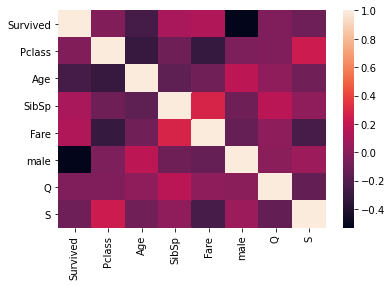

In [161]:
#Checking independence between features
sb.heatmap(titanic_final.corr())

In [168]:
#Dividing into training and testing set
X=titanic_final.iloc[:,1:7]
y=titanic_final.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [178]:

from sklearn.linear_model import LogisticRegression


# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

# Predictions
y_pred=logreg.predict(X_test)

I should inform something here. When I first ran the code, I noticed that it threw an error and said to increase the number of iterations or scale the data, and that is why I added max_iter=1000 there.

In [179]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[ 7,  6],
       [ 6, 36]], dtype=int64)

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.86      0.86      0.86        42

    accuracy                           0.78        55
   macro avg       0.70      0.70      0.70        55
weighted avg       0.78      0.78      0.78        55



78% seems pretty good! 